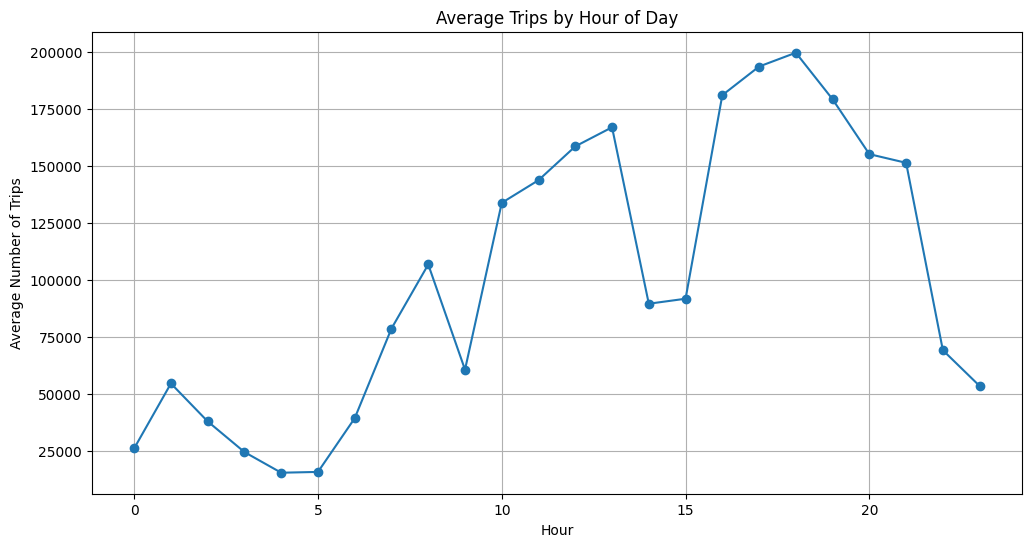

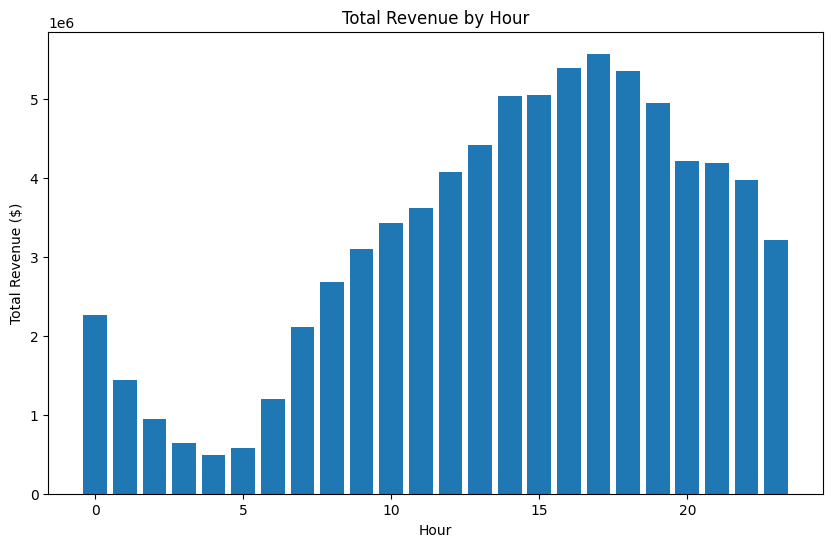

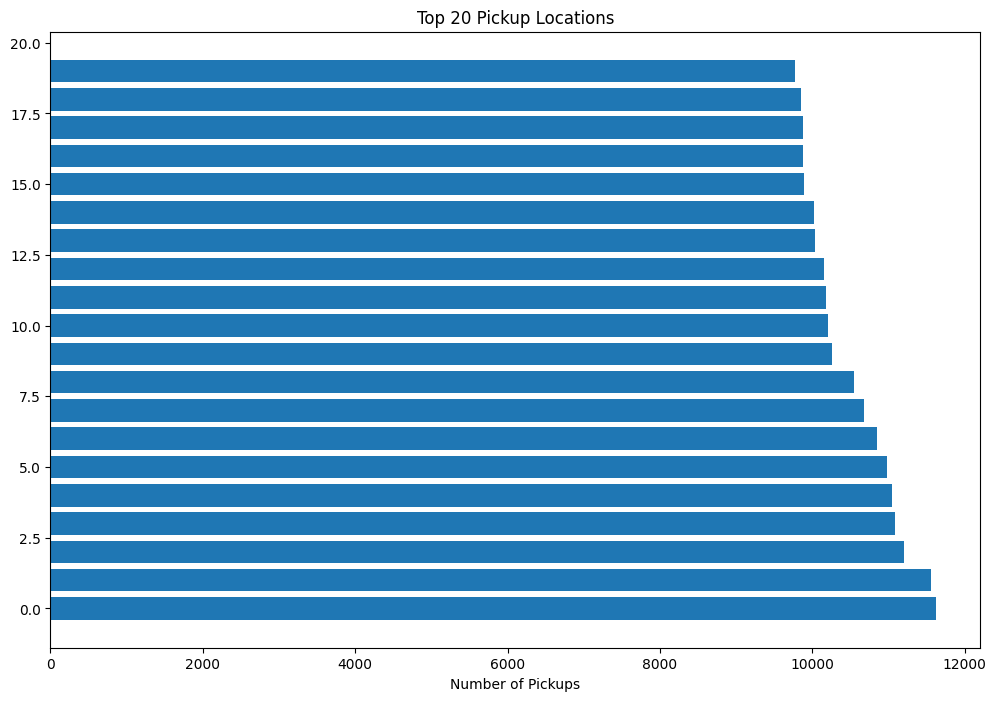

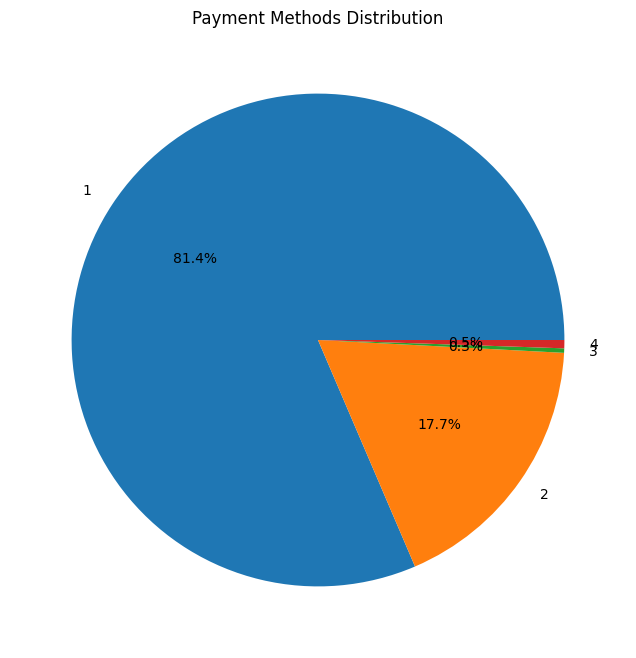

In [3]:
# Trong Jupyter notebook
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Analytics").getOrCreate()

# Đọc Gold layer data
hourly_df = spark.read.parquet(r"D:\BD-SIC-2025\nyc_taxi_pipeline\data\gold\hourly_trip_analytics").toPandas()
location_df = spark.read.parquet(r"D:\BD-SIC-2025\nyc_taxi_pipeline\data\gold\location_hotspots").toPandas()
payment_df = spark.read.parquet(r"D:\BD-SIC-2025\nyc_taxi_pipeline\data\gold\payment_analytics").toPandas()

# 1. Hourly Trip Pattern Analysis
plt.figure(figsize=(12, 6))
hourly_avg = hourly_df.groupby('pickup_hour')['total_trips'].mean()
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title('Average Trips by Hour of Day')   
plt.xlabel('Hour')
plt.ylabel('Average Number of Trips')
plt.grid(True)
plt.show()

# 2. Revenue Analysis
plt.figure(figsize=(10, 6))
revenue_by_hour = hourly_df.groupby('pickup_hour')['total_revenue'].sum()
plt.bar(revenue_by_hour.index, revenue_by_hour.values)
plt.title('Total Revenue by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Revenue ($)')
plt.show()

# 3. Location Hotspots
plt.figure(figsize=(12, 8))
top_locations = location_df.nlargest(20, 'pickup_count')
plt.barh(range(len(top_locations)), top_locations['pickup_count'])
plt.title('Top 20 Pickup Locations')
plt.xlabel('Number of Pickups')
plt.show()

# 4. Payment Method Distribution
payment_summary = payment_df.groupby('payment_type')['payment_count'].sum()
plt.figure(figsize=(8, 8))
plt.pie(payment_summary.values, labels=payment_summary.index, autopct='%1.1f%%')
plt.title('Payment Methods Distribution')
plt.show()